In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data Preparation

In [50]:
df = pd.read_csv('imbd_cleaned.csv')

# Mappa di raggruppamento
category_mapping = {
    'movie': 'Movies',
    'tvMovie': 'Movies',
    'short': 'Shorts',
    'tvShort': 'Shorts',
    'tvSeries': 'TV Series',
    'tvMiniSeries': 'TV Series',
    'tvEpisode': 'TV Series',
    'tvSpecial': 'TV Special',
    'video': 'Video',
    'videoGame': 'Videogame'
}

# Applicare la mappa al dataframe
df['titleType'] = df['titleType'].map(category_mapping)

X = df.select_dtypes(include=['number'])

X = X.values
y = np.array(df['titleType'])

In [51]:
from sklearn.model_selection import train_test_split, cross_val_score 

from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100, stratify=y)

In [53]:
from sklearn.preprocessing import StandardScaler

In [54]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Sklearn Multilayer Perceptron

In [7]:
from sklearn.neural_network import MLPClassifier

In [8]:
hidden_layer_sizes = (100, 200,)

In [9]:
clf = MLPClassifier(random_state=0)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

c:\Users\alban\OneDrive - University of Pisa\Desktop\Data Mining II\Project\Data-Mining-2\Data-Mining-2\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy 0.9261036253166828
F1-score [0.91876342 0.96820193 0.89195631 0.27125506 0.54593573 0.75559534]
              precision    recall  f1-score   support

        Film       0.90      0.93      0.92     12815
    Serie TV       0.97      0.97      0.97     24378
      Shorts       0.88      0.90      0.89      4994
 Speciale TV       0.45      0.19      0.27       344
       Video       0.66      0.47      0.55      1543
   Videogame       0.72      0.80      0.76       529

    accuracy                           0.93     44603
   macro avg       0.76      0.71      0.73     44603
weighted avg       0.92      0.93      0.92     44603



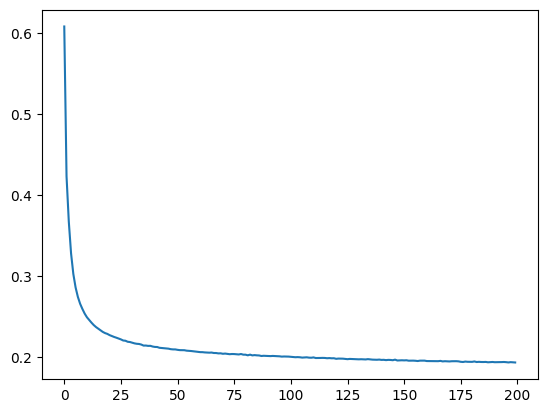

In [10]:
plt.plot(clf.loss_curve_)
plt.show()

In [18]:
from sklearn.impute import SimpleImputer

X_train = np.array(X_train, dtype=np.float64)
X_test = np.array(X_test, dtype=np.float64)

imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)


In [17]:
clf = MLPClassifier(hidden_layer_sizes=(128, 64, 32,), alpha=0.1,
                    learning_rate='adaptive',
                    activation='tanh', early_stopping=False,
                    momentum=0.9, random_state=0, max_iter=500)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9265296056319081
F1-score [0.92088238 0.96621663 0.88626292 0.29045643 0.54801125 0.77134446]
              precision    recall  f1-score   support

        Film       0.92      0.92      0.92     12815
    Serie TV       0.95      0.98      0.97     24378
      Shorts       0.87      0.90      0.89      4994
 Speciale TV       0.51      0.20      0.29       344
       Video       0.72      0.44      0.55      1543
   Videogame       0.80      0.74      0.77       529

    accuracy                           0.93     44603
   macro avg       0.80      0.70      0.73     44603
weighted avg       0.92      0.93      0.92     44603



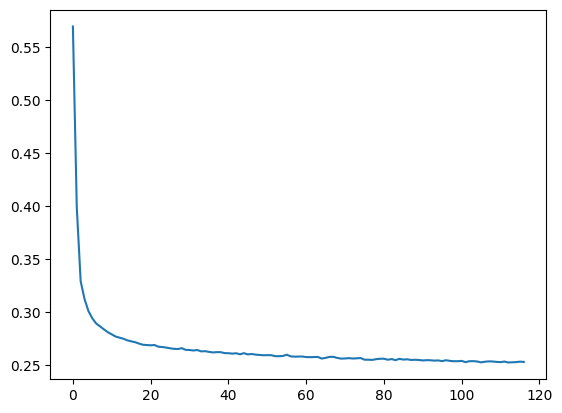

In [18]:
plt.plot(clf.loss_curve_)
plt.show()

In [ ]:
clf = MLPClassifier(hidden_layer_sizes=(128, 64, 32,), alpha=0.1, learning_rate='adaptive',
                    activation='tanh', early_stopping=True, momentum=0.9, random_state=0)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [ ]:
plt.plot(clf.loss_curve_)
plt.show()

In [20]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
param_list = {
    'hidden_layer_sizes': [(256, 128, 64,), (128, 64, 32,), (64, 32,)],
    'alpha': [0.1, 0.01, 0.001],
    'activation': ['tanh', 'relu', 'logistic'],
    'solver': ['sgd', 'adam'],
    'early_stopping': [True, False]
}

In [ ]:
random_search = RandomizedSearchCV(
    MLPClassifier(random_state=0, max_iter=1000),
    param_distributions=param_list,
    n_jobs=-1,
    refit=True,
    verbose=2
)

In [ ]:
random_search.fit(X_train, y_train)

In [ ]:
print(random_search.best_params_, random_search.best_score_)

# PyTorch

In [1]:
# !pip3 install torch
# !pip install torchsummary
# !pip install pytorch-ignite

In [55]:
import torch
import torch.nn as nn
import torch.optim as optim

from torchsummary import summary
from torch.utils.data import TensorDataset, DataLoader

from ignite.metrics import Accuracy, Loss
from ignite.engine import Engine, Events, create_supervised_trainer, create_supervised_evaluator

In [56]:
# creates validation set
X_val, X_new_test, y_val, y_new_test = train_test_split(X_test, y_test, test_size=0.2, random_state=42, stratify=y_test)

### One-Hot encoding di Y

In [59]:
from sklearn.preprocessing import LabelEncoder

# Inizializza il label encoder
label_encoder = LabelEncoder()

# Codifica y_train, y_val, y_test (trasforma stringhe in interi)
y_train_int = label_encoder.fit_transform(y_train)
y_val_int = label_encoder.transform(y_val)
y_test_int = label_encoder.transform(y_test)

In [60]:
# numpy to tensor
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_int, dtype=torch.long)

X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val_int, dtype=torch.long)

X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test_int, dtype=torch.long)

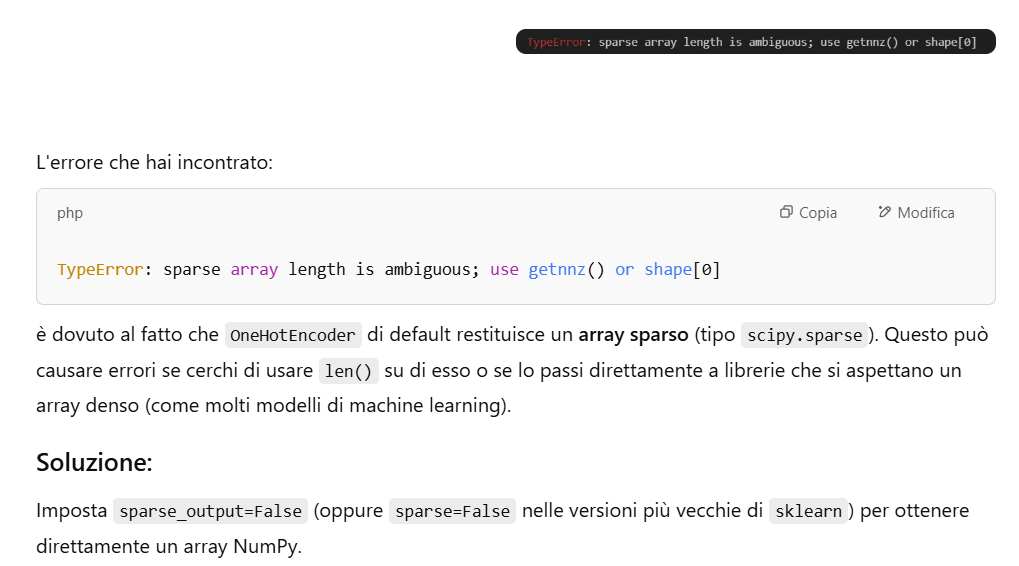

In [61]:
# creates tensor dataset (can be later loaded)
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

In [62]:
# creates data loaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=False)
val_loader = DataLoader(val_dataset, batch_size=32)
test_loader = DataLoader(test_dataset, batch_size=32)

In [63]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

In [64]:
class CustomModel(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size):
        super(CustomModel, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.fc3 = nn.Linear(hidden_size2, output_size)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [65]:
# define hyperparameters
n_classes = len(np.unique(y_train))
input_size = X_train.shape[1]
hidden_size1 = 128
hidden_size2 = 64
output_size = n_classes

In [66]:
# instanciates model
model = CustomModel(input_size, hidden_size1, hidden_size2, output_size)

In [39]:
summary(model, input_size=(input_size,))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                  [-1, 128]           2,816
              ReLU-2                  [-1, 128]               0
            Linear-3                   [-1, 64]           8,256
              ReLU-4                   [-1, 64]               0
            Linear-5                    [-1, 6]             390
Total params: 11,462
Trainable params: 11,462
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.04
Estimated Total Size (MB): 0.05
----------------------------------------------------------------


In [67]:
# optimizer and loss function
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

In [68]:
# ignite trainer
trainer = create_supervised_trainer(model, optimizer, criterion, device)

# validation metrics are ignite metrics
val_metrics = {"accuracy": Accuracy(), "loss": Loss(criterion)}

# ignite train and validation evaluators
train_evaluator = create_supervised_evaluator(model, metrics=val_metrics, device=device)
val_evaluator = create_supervised_evaluator(model, metrics=val_metrics, device=device)

training_history = {'accuracy':[],'loss':[]}
validation_history = {'accuracy':[],'loss':[]}

In [69]:
# For logging purposes we add a function to be executed at the end of every log_interval-th iteration:
log_interval = 100

@trainer.on(Events.ITERATION_COMPLETED(every=log_interval))
def log_training_loss(engine):
    print(f"Epoch[{engine.state.epoch}], Iter[{engine.state.iteration}] Loss: {engine.state.output:.2f}")

# after a training epoch, computes training and validation metrics (train_eval on train_loader and val_eval on val_loader)
@trainer.on(Events.EPOCH_COMPLETED)
def log_training_results(trainer):
    train_evaluator.run(train_loader)
    metrics = train_evaluator.state.metrics
    training_history['accuracy'].append(metrics['accuracy']*100)
    training_history['loss'].append(metrics['loss'])
    print(f"Training Results - Epoch[{trainer.state.epoch}] Avg accuracy: {metrics['accuracy']:.2f} Avg loss: {metrics['loss']:.2f}")

@trainer.on(Events.EPOCH_COMPLETED)
def log_validation_results(trainer):
    val_evaluator.run(val_loader)
    metrics = val_evaluator.state.metrics
    validation_history['accuracy'].append(metrics['accuracy']*100)
    validation_history['loss'].append(metrics['loss'])
    print(f"Validation Results - Epoch[{trainer.state.epoch}] Avg accuracy: {metrics['accuracy']:.2f} Avg loss: {metrics['loss']:.2f}")

In [72]:
trainer.run(train_loader, max_epochs=10)

Training Results - Epoch[4] Avg accuracy: 0.93 Avg loss: 0.23
Validation Results - Epoch[4] Avg accuracy: 0.92 Avg loss: 0.24
Epoch[5], Iter[9800] Loss: 0.21
Epoch[5], Iter[9900] Loss: 0.15
Epoch[5], Iter[10000] Loss: 0.20
Epoch[5], Iter[10100] Loss: 0.28
Epoch[5], Iter[10200] Loss: 0.13
Epoch[5], Iter[10300] Loss: 0.12
Epoch[5], Iter[10400] Loss: 0.10
Epoch[5], Iter[10500] Loss: 0.25
Epoch[5], Iter[10600] Loss: 0.34
Epoch[5], Iter[10700] Loss: 0.06
Epoch[5], Iter[10800] Loss: 0.18
Epoch[5], Iter[10900] Loss: 0.17
Epoch[5], Iter[11000] Loss: 0.67
Epoch[5], Iter[11100] Loss: 0.22
Epoch[5], Iter[11200] Loss: 0.12
Epoch[5], Iter[11300] Loss: 0.39
Epoch[5], Iter[11400] Loss: 0.15
Epoch[5], Iter[11500] Loss: 0.07
Epoch[5], Iter[11600] Loss: 0.29
Epoch[5], Iter[11700] Loss: 0.27
Epoch[5], Iter[11800] Loss: 0.37
Epoch[5], Iter[11900] Loss: 0.17
Epoch[5], Iter[12000] Loss: 0.36
Epoch[5], Iter[12100] Loss: 0.41
Epoch[5], Iter[12200] Loss: 0.38
Epoch[5], Iter[12300] Loss: 0.32
Epoch[5], Iter[124

State:
	iteration: 29277
	epoch: 10
	epoch_length: 3253
	max_epochs: 10
	output: 0.47083795070648193
	batch: <class 'list'>
	metrics: <class 'dict'>
	dataloader: <class 'torch.utils.data.dataloader.DataLoader'>
	seed: <class 'NoneType'>
	times: <class 'dict'>

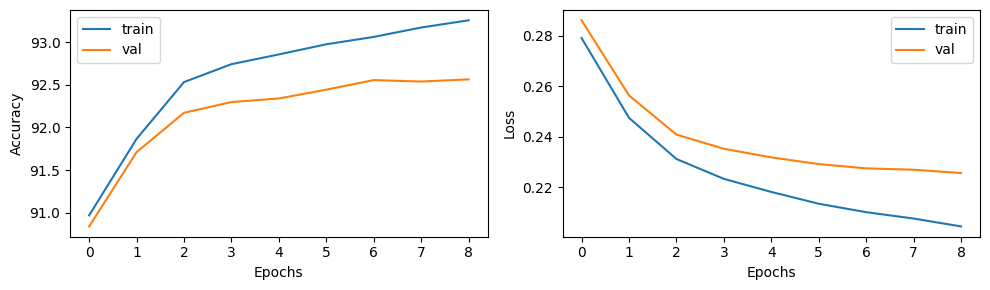

In [73]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 3))
axes[0].plot(training_history['accuracy'], label='train')
axes[0].plot(validation_history['accuracy'], label='val')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Accuracy')
axes[0].legend()

axes[1].plot(training_history['loss'], label='train')
axes[1].plot(validation_history['loss'], label='val')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Loss')
axes[1].legend()
fig.tight_layout()

plt.show()

### Early Stopping

In [74]:
from ignite.handlers import EarlyStopping, ModelCheckpoint
from ignite.contrib.handlers import global_step_from_engine

In [75]:
# model + optimizer + criterion
model = CustomModel(input_size, hidden_size1, hidden_size2, output_size)
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

# ignite trainer + evaluators
trainer = create_supervised_trainer(model, optimizer, criterion, device)
val_metrics = {"accuracy": Accuracy(), "loss": Loss(criterion)}
train_evaluator = create_supervised_evaluator(model, metrics=val_metrics, device=device)
val_evaluator = create_supervised_evaluator(model, metrics=val_metrics, device=device)

training_history = {'accuracy':[],'loss':[]}
validation_history = {'accuracy':[],'loss':[]}

# loggers + history appends
@trainer.on(Events.ITERATION_COMPLETED(every=log_interval))
def log_training_loss(engine):
    print(f"Epoch[{engine.state.epoch}], Iter[{engine.state.iteration}] Loss: {engine.state.output:.2f}")

# after a training epoch, computes training and validation metrics (train_eval on train_loader and val_eval on val_loader)
@trainer.on(Events.EPOCH_COMPLETED)
def log_training_results(trainer):
    train_evaluator.run(train_loader)
    metrics = train_evaluator.state.metrics
    training_history['accuracy'].append(metrics['accuracy']*100)
    training_history['loss'].append(metrics['loss'])
    print(f"Training Results - Epoch[{trainer.state.epoch}] Avg accuracy: {metrics['accuracy']:.2f} Avg loss: {metrics['loss']:.2f}")

@trainer.on(Events.EPOCH_COMPLETED)
def log_validation_results(trainer):
    val_evaluator.run(val_loader)
    metrics = val_evaluator.state.metrics
    validation_history['accuracy'].append(metrics['accuracy']*100)
    validation_history['loss'].append(metrics['loss'])
    print(f"Validation Results - Epoch[{trainer.state.epoch}] Avg accuracy: {metrics['accuracy']:.2f} Avg loss: {metrics['loss']:.2f}")

In [76]:
# return current value of any metric defined in val_metrics
def score_function(engine):
    return engine.state.metrics["accuracy"]

In [77]:
# define early stopping and model checkpoint
handler = EarlyStopping(patience=50, score_function=score_function, trainer=trainer)

checkpoint = ModelCheckpoint(
    dirname='models',
    filename_prefix='best_NOREG',
    n_saved=1,
    create_dir=True,
    global_step_transform=global_step_from_engine(trainer) # helps fetch the trainer's state
)

# Attach early stopping and model checkpoint to the trainer
val_evaluator.add_event_handler(Events.EPOCH_COMPLETED, handler)
val_evaluator.add_event_handler(Events.EPOCH_COMPLETED, checkpoint, {'model': model})

In [78]:
trainer.run(train_loader, max_epochs=300)

Epoch[1], Iter[100] Loss: 0.42
Epoch[1], Iter[200] Loss: 0.36
Epoch[1], Iter[300] Loss: 0.32
Epoch[1], Iter[400] Loss: 0.38
Epoch[1], Iter[500] Loss: 0.48
Epoch[1], Iter[600] Loss: 0.24
Epoch[1], Iter[700] Loss: 0.26
Epoch[1], Iter[800] Loss: 0.31
Epoch[1], Iter[900] Loss: 0.50
Epoch[1], Iter[1000] Loss: 0.16
Epoch[1], Iter[1100] Loss: 0.37
Epoch[1], Iter[1200] Loss: 0.17
Epoch[1], Iter[1300] Loss: 0.65
Epoch[1], Iter[1400] Loss: 0.34
Epoch[1], Iter[1500] Loss: 0.15
Epoch[1], Iter[1600] Loss: 0.44
Epoch[1], Iter[1700] Loss: 0.23
Epoch[1], Iter[1800] Loss: 0.13
Epoch[1], Iter[1900] Loss: 0.33
Epoch[1], Iter[2000] Loss: 0.40
Epoch[1], Iter[2100] Loss: 0.48
Epoch[1], Iter[2200] Loss: 0.22
Epoch[1], Iter[2300] Loss: 0.46
Epoch[1], Iter[2400] Loss: 0.50
Epoch[1], Iter[2500] Loss: 0.42
Epoch[1], Iter[2600] Loss: 0.41
Epoch[1], Iter[2700] Loss: 0.14
Epoch[1], Iter[2800] Loss: 0.50
Epoch[1], Iter[2900] Loss: 0.18
Epoch[1], Iter[3000] Loss: 0.17
Epoch[1], Iter[3100] Loss: 0.08
Epoch[1], Iter[32

2025-04-14 18:22:07,632 ignite.handlers.early_stopping.EarlyStopping INFO: EarlyStopping: Stop training


Validation Results - Epoch[73] Avg accuracy: 0.92 Avg loss: 0.27


State:
	iteration: 237469
	epoch: 73
	epoch_length: 3253
	max_epochs: 300
	output: 0.014849307015538216
	batch: <class 'list'>
	metrics: <class 'dict'>
	dataloader: <class 'torch.utils.data.dataloader.DataLoader'>
	seed: <class 'NoneType'>
	times: <class 'dict'>

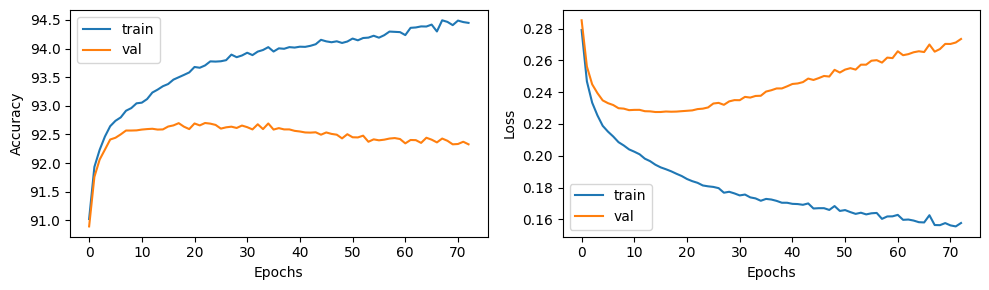

In [79]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 3))
axes[0].plot(training_history['accuracy'], label='train')
axes[0].plot(validation_history['accuracy'], label='val')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Accuracy')
axes[0].legend()

axes[1].plot(training_history['loss'], label='train')
axes[1].plot(validation_history['loss'], label='val')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Loss')
axes[1].legend()
fig.tight_layout()

plt.show()

a gigi piace il pisello